RANDOM forest 

In [6]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()


In [10]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

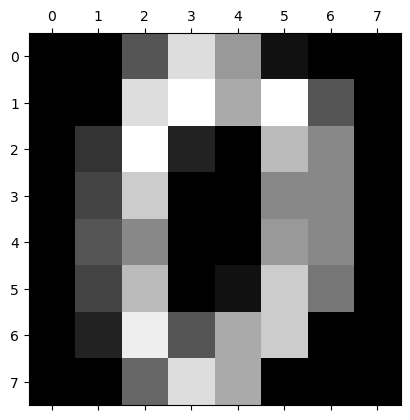

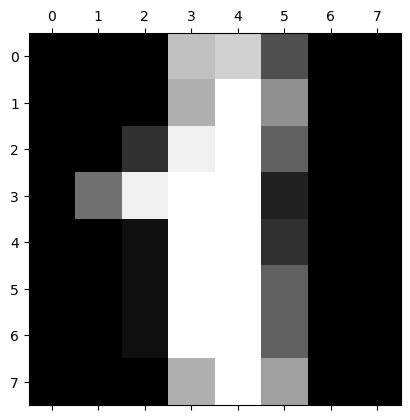

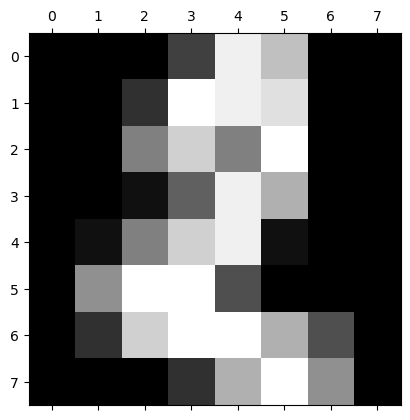

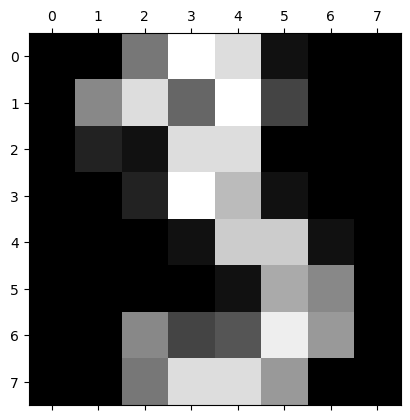

In [16]:
plt.gray()
for i in range(4):
    plt.matshow(digits.images[i])


In [17]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [20]:
digits.target[:4]

array([0, 1, 2, 3])

In [22]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [35]:
df['target']=digits.target

In [28]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [37]:
X = df.drop('target',axis='columns')
X

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [42]:
y = df.target
y

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: target, Length: 1797, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [45]:
len(X_test)

360

In [46]:
len(y_train)

1437

In [50]:
len(X_train)


1437

In [51]:
len(y_test)

360

In [52]:
len(X)

1797

In [53]:
len(y)

1797

In [54]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [55]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [58]:
model.score(X_test,y_test)

0.975

In [61]:
y_predicted = model.predict(X_test)
y_predicted

array([2, 9, 6, 3, 6, 4, 9, 5, 2, 6, 8, 0, 5, 5, 4, 6, 6, 3, 5, 1, 1, 8,
       3, 8, 2, 7, 8, 2, 8, 8, 1, 7, 8, 0, 7, 5, 0, 5, 9, 5, 3, 4, 4, 9,
       6, 1, 0, 4, 5, 0, 4, 2, 5, 8, 4, 2, 6, 3, 9, 0, 0, 7, 5, 0, 1, 2,
       7, 2, 0, 0, 7, 4, 5, 3, 4, 5, 3, 1, 7, 0, 6, 7, 8, 4, 2, 2, 9, 1,
       8, 2, 0, 5, 0, 7, 4, 5, 1, 1, 9, 3, 6, 2, 8, 3, 2, 6, 1, 9, 6, 7,
       1, 1, 8, 2, 7, 7, 1, 9, 3, 9, 8, 1, 6, 7, 3, 1, 6, 1, 3, 0, 9, 9,
       8, 6, 4, 6, 9, 6, 2, 6, 4, 2, 7, 2, 3, 9, 2, 7, 0, 4, 1, 1, 2, 8,
       5, 5, 2, 7, 7, 1, 0, 1, 7, 8, 8, 3, 1, 4, 3, 1, 4, 3, 5, 0, 3, 1,
       6, 9, 2, 9, 2, 9, 4, 6, 8, 2, 7, 8, 0, 9, 9, 7, 6, 2, 4, 8, 1, 9,
       7, 8, 1, 2, 1, 1, 7, 3, 8, 3, 6, 3, 9, 5, 3, 3, 1, 9, 3, 4, 7, 8,
       7, 9, 2, 5, 6, 9, 8, 0, 3, 7, 5, 2, 7, 1, 8, 2, 9, 5, 8, 8, 0, 0,
       5, 2, 0, 6, 2, 2, 5, 1, 5, 6, 4, 5, 0, 7, 8, 2, 7, 5, 2, 6, 9, 8,
       7, 7, 0, 2, 0, 7, 1, 6, 9, 4, 3, 2, 3, 0, 4, 3, 5, 5, 2, 8, 6, 7,
       5, 2, 6, 3, 7, 6, 0, 7, 2, 9, 8, 6, 3, 0, 5,

CONFUSION MATRIX

In [62]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  0, 31,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 33,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0, 36,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 37,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  2, 31]])

Text(95.72222222222221, 0.5, 'Truth')

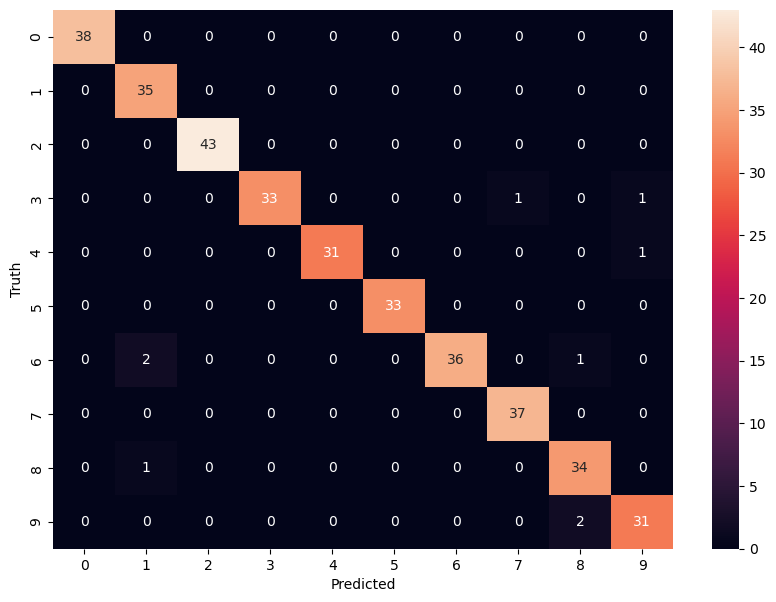

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')